In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas

### Import data

In [22]:
df = pd.read_csv('waterquality.csv')
df.head()

,season,sample_num,flush,city,state,building,fixture,chlorine_type,source_water,total_chlorine,free_chlorine,hardness,alkalinity,pH,temp
0,summer,1,first_flush,Austin,TX,house,bathroom_sink,combined,surface,0.5,0.0,120,120,7.8,26.7
1,summer,1,mains,Austin,TX,house,bathroom_sink,combined,surface,2.0,0.0,120,80,8.4,30.0
2,summer,2,first_flush,Clifton,VA,house,bathroom_sink,combined,surface,0.0,0.0,250,240,7.8,20.0
3,summer,2,mains,Clifton,VA,house,bathroom_sink,combined,surface,1.0,0.0,250,240,7.8,23.7
4,summer,3,first_flush,Reston,VA,house,bar_sink,combined,surface,0.0,0.0,250,180,7.2,16.7


In [3]:
grouped = df.groupby(['season','flush'])
grouped.describe()

sample_num                                                \
                        count  mean       std  min   25%   50%    75%   max   
season flush                                                                  
fall   first_flush       20.0  10.5  5.916080  1.0  5.75  10.5  15.25  20.0   
       mains             20.0  10.5  5.916080  1.0  5.75  10.5  15.25  20.0   
summer first_flush       19.0  10.0  5.627314  1.0  5.50  10.0  14.50  19.0   
       mains             19.0  10.0  5.627314  1.0  5.50  10.0  14.50  19.0   
winter first_flush       20.0  10.5  5.916080  1.0  5.75  10.5  15.25  20.0   
       mains             20.0  10.5  5.916080  1.0  5.75  10.5  15.25  20.0   

                   total_chlorine            ...   pH       temp             \
                            count      mean  ...  75%  max count       mean   
season flush                                 ...                              
fall   first_flush           20.0  0.125000  ...  7.8  8.4  19.0  21.984211   
       mains                 20.0  0.625000  ...  7.8  8.4  18.0  20.438889   
summer first_flush           19.0  0.184211  ...  7.8  8.4  19.0  21.610526   
       mains                 19.0  1.263158  ...  7.8  8.4  19.0  22.510526   
winter first_flush           18.0  0.027778  ...  7.8  8.4  17.0  19.335294   
       mains                 18.0  0.583333  ...  7.2  8.4  17.0  15.805882   

                                                                 
                         std   min     25%    50%     75%   max  
season flush                                                     
fall   first_flush  5.457234  13.3  20.000  21.10  23.800  40.0  
       mains        5.055124   9.8  17.925  19.15  24.825  28.2  
summer first_flush  2.955202  16.7  19.250  22.20  23.400  26.7  
       mains        4.001513  14.5  20.400  23.00  24.500  30.0  
winter first_flush  3.787635  12.0  17.000  19.00  21.500  25.5  
       mains        6.616973   7.2  10.500  14.00  20.000  31.0  

[6 rows x 56 columns]

### Water quality parameters (test strips)

Chlorine

In [27]:
summer_chlor = len(df[(df['season']=='summer') & (df['total_chlorine']==0)])
fall_chlor = len(df[(df['season']=='fall') & (df['total_chlorine']==0)])
winter_chlor = len(df[(df['season']=='winter') & (df['total_chlorine']==0)])

flush_chlor = len(df[(df['flush']=='first_flush') & (df['total_chlorine']==0)])
mains_chlor = len(df[(df['flush']=='mains') & (df['total_chlorine']==0)])

nflush = len(df[(df['flush']=='first_flush')])
nmains = len(df[(df['flush']=='mains')])
nsummer = len(df[(df['season']=='summer')])
nfall = len(df[(df['season']=='fall')])
nwinter = len(df[(df['season']=='winter')])

print('Chlorine was not detected in', round((summer_chlor/nsummer)*100,2), '% of summer samples,', 
      round((fall_chlor/nfall)*100,2),'% of fall samples, and', round((winter_chlor/nwinter)*100,2), '% of winter samples.')
print('Chlorine was not detected in', round((flush_chlor/nflush)*100,2), '% of first-flush samples and',
      round((mains_chlor/nmains)*100,2), '% of mains samples.')

Chlorine was not detected in 52.63 % of summer samples, 60.0 % of fall samples, and 63.89 % of winter samples.
Chlorine was not detected in 84.21 % of first-flush samples and 33.33 % of mains samples.


Temperature

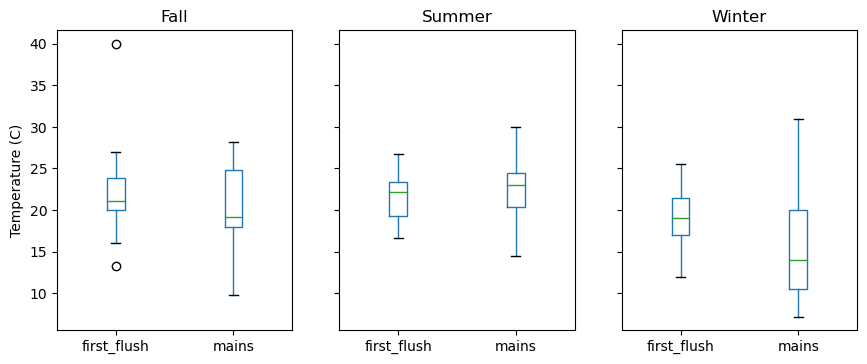

In [5]:
axes = df.groupby('season').boxplot(column=['temp'], by='flush', figsize=(10, 4),
                                         layout=(1, 3), sharey=True, grid=False)
plt.suptitle('')
axes[0].set_ylabel('Temperature (C)')
axes[0].set_xlabel('')
axes[0].set_title('Fall')

axes[1].set_xlabel('')
axes[1].set_title('Summer')

axes[2].set_xlabel('')
axes[2].set_title('Winter')

plt.rcParams.update({'font.size': 10})
plt.show();

Combine data

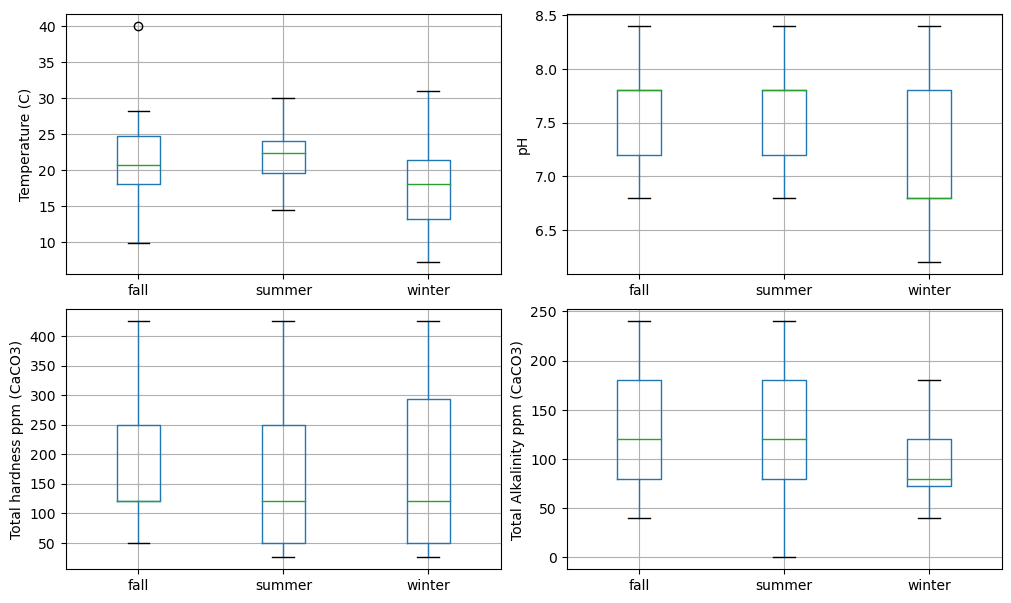

In [28]:
fig, axes = plt.subplots(2,2, figsize=(10,6), constrained_layout=True)

df.boxplot(column='temp', by='season', ax=axes[0,0]) # add boxplot to 1st subplot
axes[0,0].set_ylabel('Temperature (C)')
axes[0,0].set_xlabel('')
axes[0,0].set_title('')

df.boxplot(column='pH', by='season', ax=axes[0,1]) # add boxplot to 2nd subplot
axes[0,1].set_ylabel('pH')
axes[0,1].set_xlabel('')
axes[0,1].set_title('')

df.boxplot(column='hardness', by='season', ax=axes[1,0])
axes[1,0].set_ylabel('Total hardness ppm (CaCO3)')
axes[1,0].set_xlabel('')
axes[1,0].set_title('')

df.boxplot(column='alkalinity', by='season', ax=axes[1,1])
axes[1,1].set_ylabel('Total Alkalinity ppm (CaCO3)')
axes[1,1].set_xlabel('')
axes[1,1].set_title('')

fig.suptitle('')
plt.rcParams.update({'font.size': 10})
plt.show()

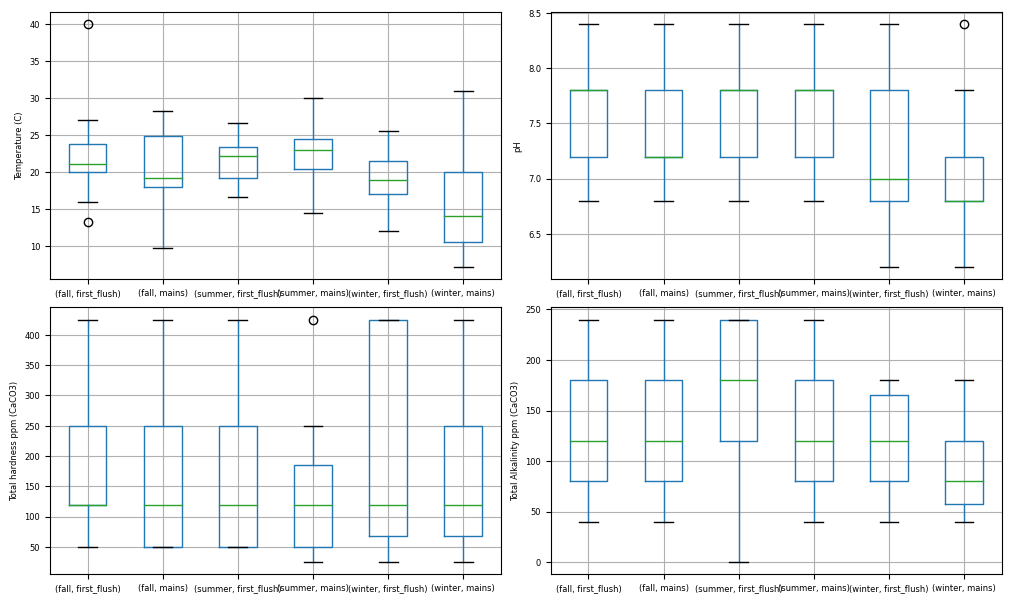

In [29]:
fig, axes = plt.subplots(2,2, figsize=(10,6), constrained_layout=True)

df.boxplot(column='temp', by=['season','flush'], ax=axes[0,0]) # add boxplot to 1st subplot
axes[0,0].set_ylabel('Temperature (C)')
axes[0,0].set_xlabel('')
axes[0,0].set_title('')

df.boxplot(column='pH', by=['season','flush'], ax=axes[0,1]) # add boxplot to 2nd subplot
axes[0,1].set_ylabel('pH')
axes[0,1].set_xlabel('')
axes[0,1].set_title('')

df.boxplot(column='hardness', by=['season','flush'], ax=axes[1,0])
axes[1,0].set_ylabel('Total hardness ppm (CaCO3)')
axes[1,0].set_xlabel('')
axes[1,0].set_title('')

df.boxplot(column='alkalinity', by=['season','flush'], ax=axes[1,1])
axes[1,1].set_ylabel('Total Alkalinity ppm (CaCO3)')
axes[1,1].set_xlabel('')
axes[1,1].set_title('')

fig.suptitle('')
plt.rcParams.update({'font.size': 6})
plt.show()

### Sampling locations

In [8]:
locations = pd.read_csv('sampling_locations.csv')

In [9]:
lon = locations['Long'].values
lat = locations['Lat'].values
colors = locations['color'].values
source = locations['source'].values
chlorine = locations['chlorine'].values

In [10]:
gdf = geopandas.read_file('./tl_2017_us_state')

In [11]:
# only want to look at continental US
gdf.drop(gdf[gdf['NAME'] == 'Hawaii'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'United States Virgin Islands'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'Commonwealth of the Northern Mariana Islands'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'Guam'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'American Samoa'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'Puerto Rico'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'Alaska'].index, inplace = True)

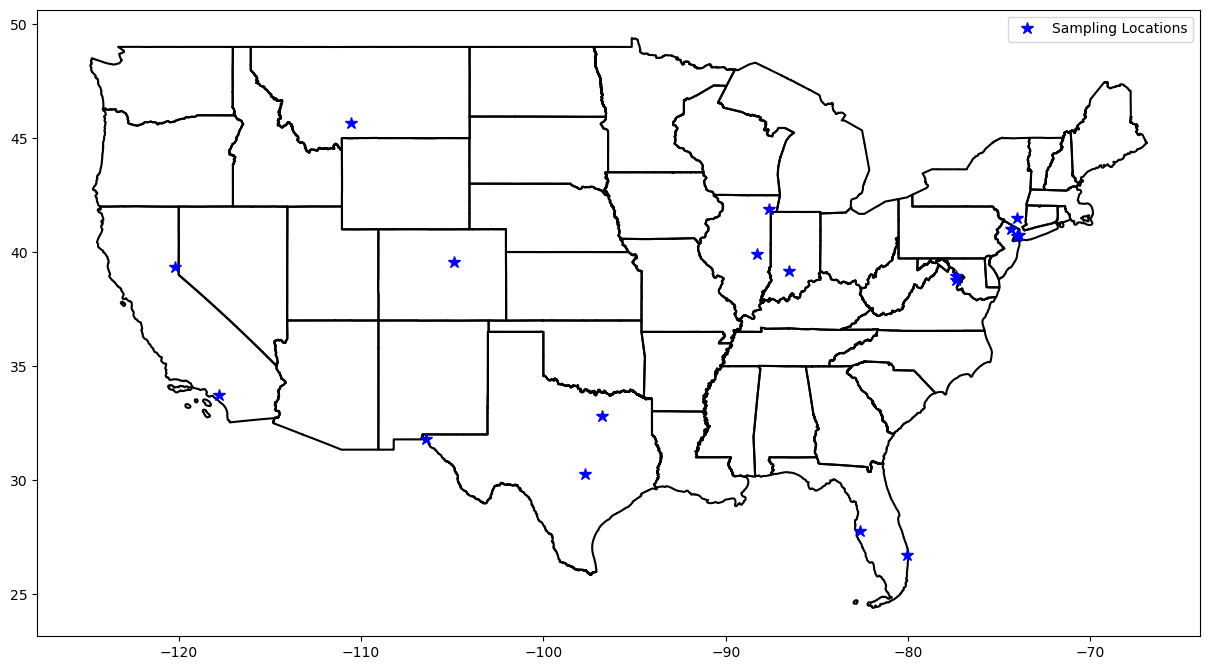

In [12]:
# Just plot all locations together
fig,ax = plt.subplots(figsize = (15,15))
gdf.boundary.plot(ax = ax, color='black')
plt.plot(lon[0:18],lat[0:18],'*',color='blue',markersize=9,label='Sampling Locations')
plt.legend();

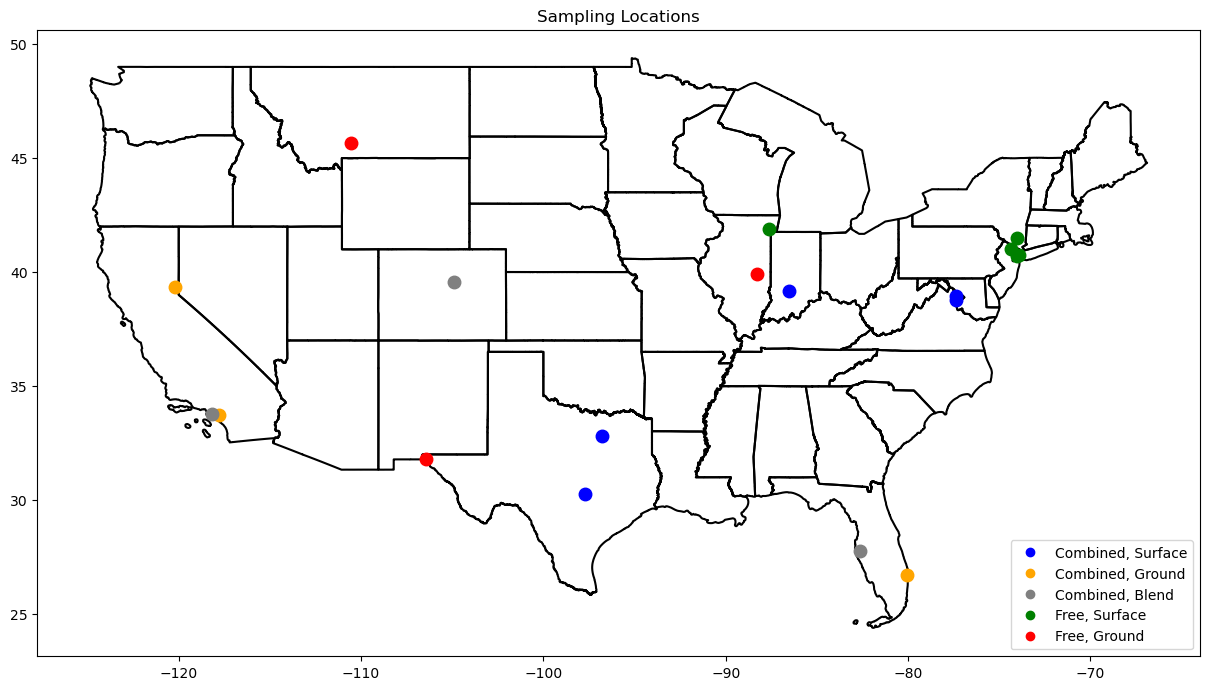

In [13]:
# Plot locations categorized by source water and secondary disinfectant
fig,ax = plt.subplots(figsize = (15,15))
gdf.boundary.plot(ax = ax, color='black')

for i in range(0,19):
    plt.plot(lon[i],lat[i],'o',color=colors[i],markersize=9)
    
plt.plot(lon[0],lat[0],'o',color='blue',label='Combined, Surface')
plt.plot(lon[13],lat[13],'o',color='orange',label='Combined, Ground')
plt.plot(lon[3],lat[3],'o',color='gray',label='Combined, Blend')

plt.plot(lon[4],lat[4],'o',color='green',label='Free, Surface')
plt.plot(lon[12],lat[12],'o',color='red',label='Free, Ground')

plt.title('Sampling Locations')
plt.legend(loc='lower right');

plt.savefig("map.png")